# Plotting data

* GWAS
* PharmGKB
* UK Biobank

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

DATAPATH = "../data"

## GWAS

Data source: The ancestry file available for download from the GWAS Catalog (downloaded on the 29th October 2023)

In [41]:
df = pd.read_csv(os.path.join(DATAPATH, "gwas_catalog-ancestry_r2023-10-29.tsv"), delimiter='\t')
df.shape

(124224, 12)

In [42]:
df.groupby("STUDY ACCESSION").nunique()

,PUBMEDID,FIRST AUTHOR,DATE,INITIAL SAMPLE DESCRIPTION,REPLICATION SAMPLE DESCRIPTION,STAGE,NUMBER OF INDIVDUALS,BROAD ANCESTRAL CATEGORY,COUNTRY OF ORIGIN,COUNTRY OF RECRUITMENT,ADDITONAL ANCESTRY DESCRIPTION
STUDY ACCESSION,,,,,,,,,,,
GCST000001,1,1,1,1,0,1,1,1,1,1,0
GCST000002,1,1,1,1,1,2,5,3,1,1,0
GCST000003,1,1,1,1,1,2,4,3,1,3,0
GCST000004,1,1,1,1,1,2,2,1,1,2,0
GCST000005,1,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
GCST90296323,1,1,1,1,0,1,2,2,1,1,0
GCST90296324,1,1,1,1,0,1,2,2,1,1,0
GCST90296325,1,1,1,1,0,1,2,2,1,1,0


In [43]:
# We eliminate studies that are replicates
df2 = df[df["STAGE"]!= "replication"]
df2.shape

(101421, 12)

In [44]:
df2.groupby("STUDY ACCESSION").nunique()

,PUBMEDID,FIRST AUTHOR,DATE,INITIAL SAMPLE DESCRIPTION,REPLICATION SAMPLE DESCRIPTION,STAGE,NUMBER OF INDIVDUALS,BROAD ANCESTRAL CATEGORY,COUNTRY OF ORIGIN,COUNTRY OF RECRUITMENT,ADDITONAL ANCESTRY DESCRIPTION
STUDY ACCESSION,,,,,,,,,,,
GCST000001,1,1,1,1,0,1,1,1,1,1,0
GCST000002,1,1,1,1,1,1,3,3,1,1,0
GCST000003,1,1,1,1,1,1,1,1,1,1,0
GCST000004,1,1,1,1,1,1,1,1,1,1,0
GCST000005,1,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
GCST90296323,1,1,1,1,0,1,2,2,1,1,0
GCST90296324,1,1,1,1,0,1,2,2,1,1,0
GCST90296325,1,1,1,1,0,1,2,2,1,1,0


In [23]:
# some studies have more than one line depending on the ancestry
df2[df2["STUDY ACCESSION"]=="GCST000002"]

,STUDY ACCESSION,PUBMEDID,FIRST AUTHOR,DATE,INITIAL SAMPLE DESCRIPTION,REPLICATION SAMPLE DESCRIPTION,STAGE,NUMBER OF INDIVDUALS,BROAD ANCESTRAL CATEGORY,COUNTRY OF ORIGIN,COUNTRY OF RECRUITMENT,ADDITONAL ANCESTRY DESCRIPTION
9527,GCST000002,16252231,Maraganore DM,2005-09-09,"381 European ancestry cases, 363 European ance...","269 European ancestry cases, 272 European ance...",initial,744.0,European,NR,U.S.,NaN
9530,GCST000002,16252231,Maraganore DM,2005-09-09,"381 European ancestry cases, 363 European ance...","269 European ancestry cases, 272 European ance...",initial,1.0,Asian unspecified,NR,U.S.,NaN
9531,GCST000002,16252231,Maraganore DM,2005-09-09,"381 European ancestry cases, 363 European ance...","269 European ancestry cases, 272 European ance...",initial,141.0,Other,NR,U.S.,NaN


In [24]:
df2[df2["BROAD ANCESTRAL CATEGORY"]=="European"].shape

(62000, 12)

In [55]:
df2[df2["BROAD ANCESTRAL CATEGORY"].str.contains("NR")].shape
df2[df2["BROAD ANCESTRAL CATEGORY"]=="NR"].shape

(5570, 12)

In [51]:
all_ancestry = list(set(df2["BROAD ANCESTRAL CATEGORY"]))
print(all_ancestry)

['South Asian, European, African American or Afro-Caribbean, East Asian, Hispanic or Latin American', 'African unspecified', 'European, African American or Afro-Caribbean, Hispanic or Latin American, Asian unspecified, Oceanian, NR', 'South East Asian', 'European, Hispanic or Latin American, Other', 'Native American, Other', 'European, Asian unspecified, African American or Afro-Caribbean, Greater Middle Eastern (Middle Eastern, North African or Persian), Oceanian, Native American, Other admixed ancestry', 'African American or Afro-Caribbean, African unspecified, European', 'European, African American or Afro-Caribbean, Hispanic or Latin American, Asian unspecified, Native American, Other', 'South Asian, African unspecified, NR', 'European, South Asian, East Asian, African American or Afro-Caribbean, Hispanic or Latin American', 'Hispanic or Latin American', 'African American or Afro-Caribbean, African unspecified, European, East Asian, Hispanic or Latin American, South Asian', 'Centra

In [27]:
df2[df2["BROAD ANCESTRAL CATEGORY"].str.contains("European")].shape

(62818, 12)

In [25]:
df2[df2["BROAD ANCESTRAL CATEGORY"].str.contains("African")].shape

(18847, 12)

In [56]:
# we will take all unique studies (STUDY ACCESSION ID) as total number, removing studies for which no Ancestry data is available
# We will use any African-related (i.e, contains "African") to define number of studies done in african or african ancestry populations
# We will use any European-related (i.e, contains European) to define number of studies done in European populations
df2_ = df2[df2["BROAD ANCESTRAL CATEGORY"]!="NR"]
total = len(df2_.groupby("STUDY ACCESSION").nunique())
afr = len(df2_[df2_["BROAD ANCESTRAL CATEGORY"].str.contains("African")])
eur = len(df2_[df2_["BROAD ANCESTRAL CATEGORY"].str.contains("European")])

print((eur/total)*100)
print((afr/total)*100)

76.30952380952381
22.89480077745384


## PharmGKB

Data Source: the study_parameters file downloadable from PharmGKB which contains the information about the biogroup for which the study was performed (accessed on 10th October 2023)

In [72]:
df = pd.read_csv(os.path.join(DATAPATH, "study_parameters.csv"))
df.shape

(32076, 3)

In [75]:
biogroups = list(set(df["biogroup"]))
biogroups

['Multiple groups, France, Italy, Finland',
 'Multiple groups, Asian and Caucasians were studied',
 'Multiple groups, White, Black, Other',
 'Multiple groups, USA, Colorado. "The most frequent self-reported race was white (Caucasian) (46.6% [163/350]) and 51.4% (180/350) of participants reported Hispanic or Latina ethnicity."',
 'Multiple groups, East-Asians, Caucasians, Hispanics and Blacks',
 'Multiple groups, USA Chicago: Caucasian (n=105), Hispanic (n=4), Asian (n=2), African American (n=1), Native American (n=1), Other (n=1)',
 'Multiple groups, 115 African Americans, 41 Hispanic and 28 white',
 'Multiple groups, Case and control cohorts were "primarily of European ancestry"',
 'Multiple groups, Two studies that were mostly Caucasian, ranging from 88% white to >95% white cases and one in Korean Asian cases',
 'Multiple groups, 98% White',
 'Multiple groups, Patients were of Caucasian, Hispanic or African American ethnicity',
 'Multiple groups, 98% white',
 'Multiple groups, "Urdu 

In [76]:
total = len(df)
print(total)
df_ = df.dropna(subset=['biogroup']) #remove empty to apply mask
afr = len(df_[df_["biogroup"].str.contains("African")])
eur = len(df_[df_["biogroup"].str.contains("European")])
print((eur/total)*100)
print((afr/total)*100)

df2_ = df_[df_["biogroup"]!="Unknown"] #remove cases where the biogrup is unknown
total_known = len(df2_)
print(total_known)
afr = len(df2_[df2_["biogroup"].str.contains("African")])
eur = len(df2_[df2_["biogroup"].str.contains("European")])
print((eur/total_known)*100)
print((afr/total_known)*100)

32076
26.315625389699466
7.3232323232323235
23515
35.896236444822456
9.989368488199021


# UK Biobank

Data comes directly from their publication:
* 94.6% European
* 1.6% African

## Plot as barplot

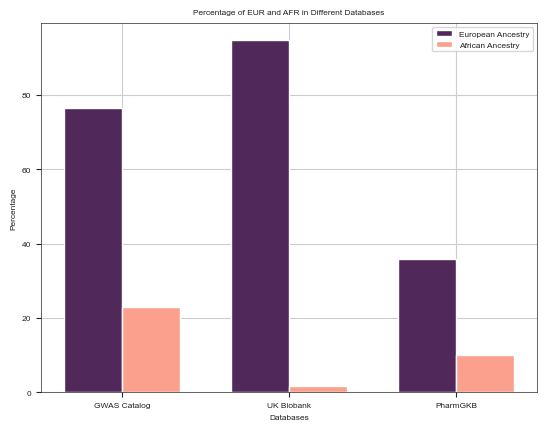

In [68]:
import matplotlib.pyplot as plt

data = {
    'GWAS Catalog': [76.3, 22.89],
    'UK Biobank': [94.6, 1.6],
    'PharmGKB': [35.89, 9.99]
}

databases = list(data.keys())
eur_percentages = [value[0] for value in data.values()]
afr_percentages = [value[1] for value in data.values()]

# Create an array for the x-axis positions
x = range(len(databases))

# Width of each bar
bar_width = 0.35

# Create the bar plot
plt.bar(x, eur_percentages, width=bar_width, label='European Ancestry', align='center', color = "#50285a")
plt.bar([i + bar_width for i in x], afr_percentages, width=bar_width, label='African Ancestry', align='center', color = "#faa08c")

# Set x-axis labels
plt.xticks([i + bar_width/2 for i in x], databases)

# Add labels and legend
plt.xlabel('Databases')
plt.ylabel('Percentage')
plt.title('Percentage of EUR and AFR in Different Databases')
plt.legend()

# Show the plot
plt.show()


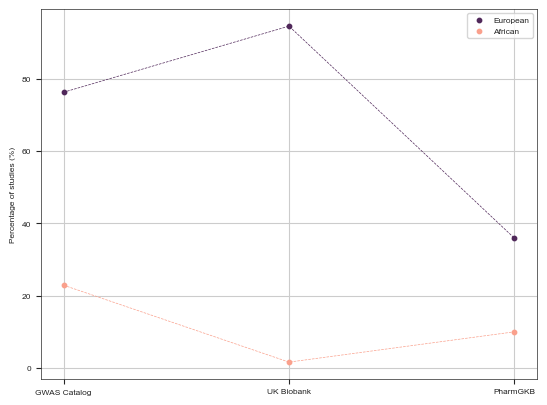

In [69]:
import matplotlib.pyplot as plt

data = {
    'GWAS Catalog': [76.3, 22.89],
    'UK Biobank': [94.6, 1.6],
    'PharmGKB': [35.89, 9.99]
}

databases = list(data.keys())
eur_percentages = [value[0] for value in data.values()]
afr_percentages = [value[1] for value in data.values()]

# Create an array for the x-axis positions
x = range(len(databases))

# Create the dot plot for EUR percentages
plt.scatter(x, eur_percentages, marker='o', label='European', color='#50285a')

# Create the dot plot for AFR percentages
plt.scatter(x, afr_percentages, marker='o', label='African', color='#faa08c')

# Draw horizontal lines connecting the EUR and AFR percentages
plt.plot(x, eur_percentages, linestyle='--', color='#50285a')
plt.plot(x, afr_percentages, linestyle='--', color='#faa08c')

# Set x-axis labels
plt.xticks(x, databases)

# Add labels and legend
plt.ylabel('Percentage of studies (%)')
plt.legend()

# Show the plot
plt.show()

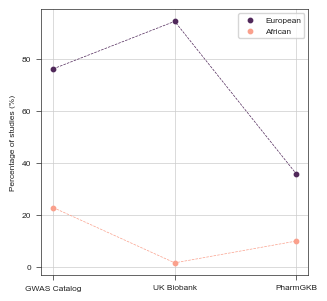

In [70]:
import stylia as st

fig, axs = st.create_figure(1,1)
ax = axs[0]

data = {
    'GWAS Catalog': [76.3, 22.89],
    'UK Biobank': [94.6, 1.6],
    'PharmGKB': [35.89, 9.99]
}

databases = list(data.keys())
eur_percentages = [value[0] for value in data.values()]
afr_percentages = [value[1] for value in data.values()]

# Create an array for the x-axis positions
x = range(len(databases))
# Create the dot plot for EUR percentages
ax.scatter(x, eur_percentages, marker='o', label='European', color='#50285a')
# Create the dot plot for AFR percentages
ax.scatter(x, afr_percentages, marker='o', label='African', color='#faa08c')

# Draw horizontal lines connecting the EUR and AFR percentages
ax.plot(x, eur_percentages, linestyle='--', color='#50285a')
ax.plot(x, afr_percentages, linestyle='--', color='#faa08c')

# Set x-axis labels
ax.set_xticks(x, databases)

# Add labels and legend
ax.set_ylabel('Percentage of studies (%)')
ax.set_title("")
ax.set_xlabel("")
plt.legend()